<a name = "inicio"></a>
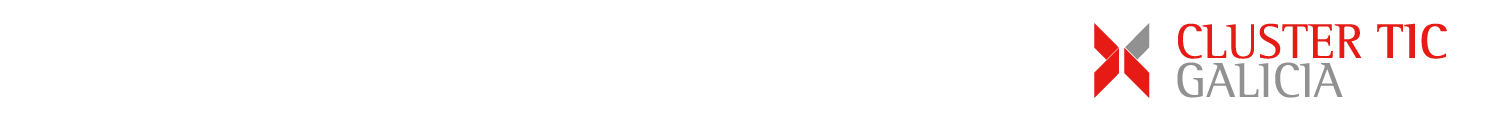

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Operaciones algebraicas</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")

# Operaciones con estructuras pandas

Al basarse la bibliteca pandas en NumPy, todas las funciones universales de esta última funcionarán con pandas, pero con una particularidad: al aplicar operaciones unarias se conservan las etiquetas de filas y columnas, y en funciones binarias, se van a alinear las filas y columnas de las estructuras involucradas por sus etiquetas.

### Operaciones con series

Si aplicamos una función unaria a una serie, el resultado es otra serie que conserva los índices de la original:

In [3]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
r

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
np.square(r)

a     1
b     4
c     9
d    16
dtype: int64

El resultado sigue siendo una serie pandas:

In [5]:
print(type(np.square(r)))

<class 'pandas.core.series.Series'>


Por otro lado, los operadores aritméticos que involucran dos o más series van a alinear las etiquetas antes de ejecutarse:

In [6]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
r

a    1
b    2
c    3
d    4
dtype: int64

In [7]:
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
s

b    1
c    2
d    3
e    4
dtype: int64

In [8]:
r + s

a    NaN
b    3.0
c    5.0
d    7.0
e    NaN
dtype: float64

En este ejemplo, hemos sumado dos series cuyas etiquetas no son todas comunes. Vemos cómo pandas ha rellenado los valores no coincidentes con *NaN*.

Si utilizamos el método [pandas.Series.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html) se asigna a la serie sobre la que se aplica el método el resultado de la suma:

In [9]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
r.add(s)

a    NaN
b    3.0
c    5.0
d    7.0
e    NaN
dtype: float64

Usando este método es posible especificar el valor a usar para rellenar los elementos desconocidos usando el parámetro **fill_value**:

In [10]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
r.add(s, fill_value = 0)

a    1.0
b    3.0
c    5.0
d    7.0
e    4.0
dtype: float64

Obsérvese que, con este atributo, no estamos simplemente sustituyendo los *NaN* del resultado por el valor indicado, sino que estamos usando dicho valor como alternativa a los valores de las series originales que no existiesen. De esta forma, vemos que el valor de la suma para la etiqueta $a$ es 1, aun cuando esta etiqueta solo está presente en la serie $r$.

Otras funciones son:

* [pandas.Series.sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html): Resta una serie a otra, elemento por elemento
* [pandas.Series.mul](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html): Multipica una serie por otra, elemento por elemento
* [pandas.Series.div](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.div.html): Divide una serie por otra, elemento por elemento
* [pandas.Series.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html): Redondea los elementos de una serie al número de decimales indicado

Tenemos en la documentación oficial el [listado completo de funciones disponibles para las series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

### Operaciones con dataframes

Como se ha comentado, las operaciones binarias alinearán los datos de los dataframes involucrados según sus etiquetas de filas y columnas antes de ejecutarse. De esta forma, si partimos de los dos siguientes dataframes:

In [11]:
data1 = pd.DataFrame({
    "A":[2, 4, 2],
    "B":[1, 0, 4],
    "C":[7, 3, 4]
    },
    index = ["jan", "feb", "mar"])
data1

,A,B,C
jan,2,1,7
feb,4,0,3
mar,2,4,4


In [12]:
data2 = pd.DataFrame({
    "A":[3, 5, 2],
    "C":[1, 2, 3],
    "D":[4, 3, 4]
    },
    index = ["feb", "mar", "apr"])
data2

,A,C,D
feb,3,1,4
mar,5,2,3
apr,2,3,4


podemos sumarlos obteniendo el siguiente resultado:

In [13]:
data1 + data2

,A,B,C,D
apr,NaN,NaN,NaN,NaN
feb,7.0,NaN,4.0,NaN
jan,NaN,NaN,NaN,NaN
mar,7.0,NaN,6.0,NaN


Vemos cómo pandas ha insertado *NaN*'s en aquellas combinaciones de etiquetas para las que no hay un valor en alguno de los dataframes.

Es de destacar -ya se ha comentado en secciones anteriores- que la alineación se produce con independencia del orden en el que las etiquetas aparezcan en los índices.

Podemos realizar la misma operación y asignar el resultado a uno de los dataframes con el método [pandas.DataFrame.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html):

In [14]:
data1.add(data2)

,A,B,C,D
apr,NaN,NaN,NaN,NaN
feb,7.0,NaN,4.0,NaN
jan,NaN,NaN,NaN,NaN
mar,7.0,NaN,6.0,NaN


Con este método, de forma semejante a como ocurría con las series, es posible establecar un valor predeterminado para aquellos valores que no se encuentren en alguno de los dataframes usando el parámetro **fill_value**:

In [15]:
data1.add(data2, fill_value = 0)

,A,B,C,D
apr,2.0,NaN,3.0,4.0
feb,7.0,0.0,4.0,4.0
jan,2.0,1.0,7.0,NaN
mar,7.0,4.0,6.0,3.0


Ahora, el valor correspondiente a $A-apr$ no es un *NaN*, sino 2 (valor que podemos encontrar en el dataframe df2). Aquellas combinaciones de etiquetas para las que no existe valor alguno en ninguno de los dos dataframes siguen recibiendo un *NaN*.

Se muestra a continuación un listado con algunas operaciones básicas disponibles como métodos de dataframes:

* [pandas.DataFrame.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html): Suma los dos dataframes, elemento por elemento
* [pandas.DataFrame.sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html): Resta a un dataframe otro dataframe, elemento por elemento
* [pandas.DataFrame.mul](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mul.html): Multiplica un dataframe por otro, elemento por elemento
* [pandas.DataFrame.div](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html): Divide un dataframe por otro, elemento por elemento
* [pandas.DataFrame.mod](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mod.html): Devuelve el resultado de calcular el módulo de un dataframe y otro dataframe, elemento por elemento
* [pandas.DataFrame.dot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html): Devuelve la multiplicación de las dos matrices representadas por los dos dataframes
* [pandas.DataFrame.abs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.abs.html): Devuelve una copia del dataframe conteniendo el valor absoluto de cada uno de sus valores

Podemos encontrar en la documentación oficial de pandas el [listado completo de funciones disponibles](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) para dataframes.

### Métodos de agregación y estadística

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Los dataframes poseen un útil método que devuelve información estadística sobre los valores contenidos en él: [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html):

In [17]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Como se aprecia en el anterior resultado, este método devuelve el número de elementos no nulos por columna, el valor medio, la desviación estándar, el valor mínimo y el máximo, y los valores correspondientes a los percentiles 25, 50 y 75.

Otras funciones estadísticas útiles disponibles como métodos de los dataframes son:

#### mean

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

Devuelve la media aritmética de los valores del dataframe a lo largo de un determinado eje (eje 0 -vertical- por defecto):

In [18]:
tips[["total_bill", "tip", "size"]].mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [19]:
tips[["total_bill", "tip", "size"]].mean(axis = 1).head(10)

0     6.666667
1     5.000000
2     9.170000
3     9.663333
4    10.733333
5    11.333333
6     4.256667
7    11.333333
8     6.333333
9     6.670000
dtype: float64

Otros métodos:

* [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html): Devuelve la mediana de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html): Devuelve la moda de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html): Devuelve la desviación estándar de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.var](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html): Devuelve la varianza de los valores del dataframe a lo largo de un determinado eje

#### pct_change

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html

Este método devuelve el porcentaje de cambio de una fila con respecto a la anterior (también puede aplicarse a columnas usando el parámetro **axis**):

In [20]:
sales = pd.DataFrame({
    "A":[3, 3, 1],
    "B":[1, 5, 2],
    "C":[3, 7, 2],
    "D":[7, 2, -1]
    },
    index = ["jan", "feb", "mar"])
sales

,A,B,C,D
jan,3,1,3,7
feb,3,5,7,2
mar,1,2,2,-1


In [21]:
sales.pct_change()

,A,B,C,D
jan,NaN,NaN,NaN,NaN
feb,0.000000,4.0,1.333333,-0.714286
mar,-0.666667,-0.6,-0.714286,-1.500000


Podemos ver que los valores de la primera fila, al no existir una anterior con respecto a la que realizar el cálculo, reciben un valor *NaN* por defecto. En todo caso, es posible regular el comportamiento del método al respecto de los valores *NaN* con el parámetro **fill_method**.

#### nunique

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

El método **nunique** devuelve el número de valores diferentes a lo largo del eje indicado:

In [22]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

Este método también existe para las series:

In [23]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### Operaciones entre dataframes y series

Podemos operar entre un dataframe y una serie. Por ejemplo, podemos partir de las siguientes estructuras:

In [24]:
data = pd.DataFrame({
    "A":[3, 5, 2],
    "B":[1, 2, 3],
    "C":[4, 3, 4],
    "D":[6, 3, 1]
    },
    index = ["Jan", "Feb", "Mar"])
data

,A,B,C,D
Jan,3,1,4,6
Feb,5,2,3,3
Mar,2,3,4,1


In [25]:
s = pd.Series([2, 1, 0, 2], index = ["A", "B", "C", "D"])
s

A    2
B    1
C    0
D    2
dtype: int64

Si calculamos la suma de ambas, obtenemos el siguiente resultado:

In [26]:
data + s

,A,B,C,D
Jan,5,2,4,8
Feb,7,3,3,5
Mar,4,4,4,3


Comprobamos que la operación se ha realizado "row-wise", aplicando la suma fila por fila, tras haberse alineado el dataframe y la serie según las etiquetas del índice de columnas.

En el caso de que las columnas no sean completamente coincidentes, se rellenarían los elementos desconocidos con *NaN*:

In [27]:
s = pd.Series([2, 1, 0, 2], index = ["A", "B", "E", "D"])
s

A    2
B    1
E    0
D    2
dtype: int64

In [28]:
data + s

,A,B,C,D,E
Jan,5.0,2.0,NaN,8.0,NaN
Feb,7.0,3.0,NaN,5.0,NaN
Mar,4.0,4.0,NaN,3.0,NaN


Es posible usar los métodos vistos en la sección anterior para operar también entre dataframes y series, pudiendo especificar el eje a lo largo del cual quiere realizarse la operación. Si seguimos con el ejemplo de la suma, podemos ejecutar el método **add** y especificar el eje deseado:

In [29]:
data

,A,B,C,D
Jan,3,1,4,6
Feb,5,2,3,3
Mar,2,3,4,1


In [30]:
s = pd.Series([2, 1, 0], index = ["Jan", "Feb", "Mar"])
s

Jan    2
Feb    1
Mar    0
dtype: int64

In [31]:
data.add(s, axis = 0)

,A,B,C,D
Jan,5,3,6,8
Feb,6,3,4,4
Mar,2,3,4,1


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>